<a href="https://colab.research.google.com/github/ftarakdjian/infovis/blob/master/ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/drive/MyDrive/DATOSPRED.xlsx')

In [4]:
df.head(10)

,EDAD,RANGO EDAD,RANGO EDAD 2,TRABAJO,ESTADO CIVIL,EDUCACION,MORA,BALANCE,balance outlier 5%,Balance outlier ICR,log balance,CATEGORIA BALANCE,PRESTAMO PARA CASA,PRESTAMO PERSONAL,CANTIDAD PRESTAMOS,TIPO CONTACTO,TENGO CONTACTO,ULTIMO DIA CONTACTO,ULTIMO MES CONTACTO,DURACION,DURACION MINUTOS,TIPO DURACION,CANTIDAD LLAMADOS,DIAS DESDE EL ULTIMO LLAMADO,CANT LLAMADOS CAMPAÑA ANTERIOR,RESULTADO LLAMADOS ANTERIORES,RESULTADO BINARIO,TIENE DEPOSITO A LARGO PLAZO,TARGET
0,58,51-60,26-60,management,married,tertiary,no,2143,0,0,3.331022,positivo,yes,no,1,unknown,0,5,may,261,4,4 a 8,1,-1,0,unknown,0,no,0
1,44,41-50,26-60,technician,single,secondary,no,29,0,0,1.462398,cero,yes,no,1,unknown,0,5,may,151,3,1 a 4,1,-1,0,unknown,0,no,0
2,33,31-40,26-60,entrepreneur,married,secondary,no,2,0,0,0.301030,cero,yes,yes,2,unknown,0,5,may,76,1,1 a 4,1,-1,0,unknown,0,no,0
3,47,41-50,26-60,blue-collar,married,unknown,no,1506,0,0,3.177825,positivo,yes,no,1,unknown,0,5,may,92,2,1 a 4,1,-1,0,unknown,0,no,0
4,33,31-40,26-60,unknown,single,unknown,no,1,0,0,0.000000,cero,no,no,0,unknown,0,5,may,198,3,1 a 4,1,-1,0,unknown,0,no,0
5,35,31-40,26-60,management,married,tertiary,no,231,0,0,2.363612,cero,yes,no,1,unknown,0,5,may,139,2,1 a 4,1,-1,0,unknown,0,no,0
6,28,21-30,26-60,management,single,tertiary,no,447,0,0,2.650308,cero,yes,yes,2,unknown,0,5,may,217,4,4 a 8,1,-1,0,unknown,0,no,0
7,42,41-50,26-60,entrepreneur,divorced,tertiary,yes,2,0,0,0.301030,cero,yes,no,1,unknown,0,5,may,380,6,4 a 8,1,-1,0,unknown,0,no,0
8,58,51-60,26-60,retired,married,primary,no,121,0,0,2.082785,cero,yes,no,1,unknown,0,5,may,50,1,1 a 4,1,-1,0,unknown,0,no,0
9,43,41-50,26-60,technician,single,secondary,no,593,0,0,2.773055,positivo,yes,no,1,unknown,0,5,may,55,1,1 a 4,1,-1,0,unknown,0,no,0


In [5]:
inicial = df[['EDAD', 'TRABAJO', 'ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE','PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 
       'TIPO CONTACTO',  'ULTIMO DIA CONTACTO', 'ULTIMO MES CONTACTO', 'DURACION', 
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'TIENE DEPOSITO A LARGO PLAZO']]
inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   EDAD                            45211 non-null  int64 
 1   TRABAJO                         45211 non-null  object
 2   ESTADO CIVIL                    45211 non-null  object
 3   EDUCACION                       45211 non-null  object
 4   MORA                            45211 non-null  object
 5   BALANCE                         45211 non-null  int64 
 6   PRESTAMO PARA CASA              45211 non-null  object
 7   PRESTAMO PERSONAL               45211 non-null  object
 8   TIPO CONTACTO                   45211 non-null  object
 9   ULTIMO DIA CONTACTO             45211 non-null  int64 
 10  ULTIMO MES CONTACTO             45211 non-null  object
 11  DURACION                        45211 non-null  int64 
 12  CANTIDAD LLAMADOS               45211 non-null

In [6]:
df.columns

Index(['EDAD', 'RANGO EDAD', 'RANGO EDAD 2', 'TRABAJO', 'ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET'],
      dtype='object')

# tratamiento variables

In [7]:
#para seleccionar variables doble corchete, comillas simples separo por comas
datos = df[['RANGO EDAD 2', 'TRABAJO','MORA','EDUCACION','CATEGORIA BALANCE', 'CANTIDAD PRESTAMOS','TENGO CONTACTO','CANTIDAD LLAMADOS', 'RESULTADO BINARIO','TARGET']]

In [8]:
datos.head(10)

,RANGO EDAD 2,TRABAJO,MORA,EDUCACION,CATEGORIA BALANCE,CANTIDAD PRESTAMOS,TENGO CONTACTO,CANTIDAD LLAMADOS,RESULTADO BINARIO,TARGET
0,26-60,management,no,tertiary,positivo,1,0,1,0,0
1,26-60,technician,no,secondary,cero,1,0,1,0,0
2,26-60,entrepreneur,no,secondary,cero,2,0,1,0,0
3,26-60,blue-collar,no,unknown,positivo,1,0,1,0,0
4,26-60,unknown,no,unknown,cero,0,0,1,0,0
5,26-60,management,no,tertiary,cero,1,0,1,0,0
6,26-60,management,no,tertiary,cero,2,0,1,0,0
7,26-60,entrepreneur,yes,tertiary,cero,1,0,1,0,0
8,26-60,retired,no,primary,cero,1,0,1,0,0
9,26-60,technician,no,secondary,positivo,1,0,1,0,0


In [9]:
var_cat = datos.select_dtypes('object').columns
datos_dummy = pd.get_dummies(datos,columns=var_cat)

In [10]:
# Veo una correlacion inicial
df_corr = datos_dummy.corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CANTIDAD PRESTAMOS,TENGO CONTACTO,CANTIDAD LLAMADOS,RESULTADO BINARIO,TARGET,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,RANGO EDAD 2_60 +,TRABAJO_admin.,TRABAJO_blue-collar,TRABAJO_entrepreneur,TRABAJO_housemaid,TRABAJO_management,TRABAJO_retired,TRABAJO_self-employed,TRABAJO_services,TRABAJO_student,TRABAJO_technician,TRABAJO_unemployed,TRABAJO_unknown,MORA_no,MORA_yes,EDUCACION_primary,EDUCACION_secondary,EDUCACION_tertiary,EDUCACION_unknown,CATEGORIA BALANCE_cero,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo
CANTIDAD PRESTAMOS,1.000000,-0.160252,-0.012808,-0.103381,-0.149540,-0.023131,0.150430,-0.163911,0.051898,0.150698,0.031554,-0.072677,-0.072677,-0.132254,-0.026148,0.076303,-0.101204,-0.001498,-0.059005,-0.077807,-0.040238,0.040238,0.001199,0.121360,-0.105020,-0.066679,0.068477,0.099719,-0.093068
TENGO CONTACTO,-0.160252,1.000000,-0.004853,0.114997,0.150935,-0.006272,-0.064228,0.080980,-0.005961,-0.138141,-0.004867,0.004815,0.090999,0.036504,0.015358,-0.039184,0.043908,0.038252,0.018464,-0.017228,0.019933,-0.019933,-0.080104,-0.045659,0.128359,-0.035002,-0.032195,-0.034363,0.040677
CANTIDAD LLAMADOS,-0.012808,-0.004853,1.000000,-0.057486,-0.073172,-0.022510,0.037880,-0.029914,-0.021868,0.008986,0.002128,0.003097,0.016686,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091,-0.016822,0.016822,0.009616,-0.020893,0.012866,0.005704,0.034737,0.006257,-0.036309
RESULTADO BINARIO,-0.103381,0.114997,-0.057486,1.000000,0.306788,0.030599,-0.107091,0.107065,0.012056,-0.053074,-0.019111,-0.009375,0.021453,0.055485,0.001494,-0.022934,0.048048,-0.002929,0.015044,0.002126,0.023344,-0.023344,-0.032937,-0.024728,0.047927,0.011743,-0.053369,-0.023200,0.059125
TARGET,-0.149540,0.150935,-0.073172,0.306788,1.000000,0.058329,-0.149070,0.138319,0.005637,-0.072083,-0.019662,-0.015195,0.032919,0.079245,0.000855,-0.027864,0.076897,-0.008970,0.020390,0.000267,0.022419,-0.022419,-0.040393,-0.036388,0.066448,0.012053,-0.074346,-0.024127,0.080350
RANGO EDAD 2_18-25,-0.023131,-0.006272,-0.022510,0.030599,0.058329,1.000000,-0.547228,-0.027358,-0.001326,-0.011019,-0.020215,-0.016538,-0.053427,-0.030227,-0.015681,0.006740,0.363129,-0.024070,-0.008293,-0.010808,0.003240,-0.003240,-0.023541,0.047344,-0.050532,0.039321,0.015833,-0.007334,-0.014044
RANGO EDAD 2_26-60,0.150430,-0.064228,0.037880,-0.107091,-0.149070,-0.547228,1.000000,-0.821699,0.037832,0.072482,0.028954,-0.020899,0.072841,-0.419212,0.019980,0.042893,-0.182331,0.067603,0.023728,-0.013729,-0.019121,0.019121,-0.065282,0.019358,0.056126,-0.059673,0.046601,0.023032,-0.052309
RANGO EDAD 2_60 +,-0.163911,0.080980,-0.029914,0.107065,0.138319,-0.027358,-0.821699,1.000000,-0.044280,-0.079063,-0.020815,0.036221,-0.050616,0.521255,-0.013185,-0.055817,-0.029502,-0.064349,-0.022692,0.023756,0.020630,-0.020630,0.093997,-0.055357,-0.032624,0.044494,-0.066438,-0.022514,0.072037
TRABAJO_admin.,0.051898,-0.005961,-0.021868,0.012056,0.005637,-0.001326,0.037832,-0.044280,1.000000,-0.188216,-0.066273,-0.060349,-0.184835,-0.082511,-0.068364,-0.114309,-0.052308,-0.161505,-0.061907,-0.028774,0.010037,-0.010037,-0.111364,0.217639,-0.144780,-0.014495,0.018458,-0.001845,-0.018022
TRABAJO_blue-collar,0.150698,-0.138141,0.008986,-0.053074,-0.072083,-0.011019,0.072482,-0.079063,-0.188216,1.000000,-0.096585,-0.087951,-0.269376,-0.120251,-0.099633,-0.166592,-0.076234,-0.235376,-0.090223,-0.041935,-0.010341,0.010341,0.342688,0.040548,-0.320541,0.014715,0.032739,0.005619,-0.034151


In [11]:
# COMO HACER TABLAS DINAMICAS
print("Porcentaje de plazos fijos:")

datos_crosstab_edu = pd.crosstab(datos['TRABAJO'], 
                            datos['TARGET'],
                                margins = False)/len(datos)*100
                  
dfBarras = datos_crosstab_edu
dfBarras

Porcentaje de plazos fijos:


TARGET,0,1
TRABAJO,,
admin.,10.041804,1.395678
blue-collar,19.959744,1.565991
entrepreneur,3.016965,0.272058
housemaid,2.501604,0.241092
management,18.042069,2.877618
retired,3.866316,1.141315
self-employed,3.078897,0.413616
services,8.371856,0.816173
student,1.479728,0.594988


In [12]:
#COMO EDITAR COLUMNAS
datos['TIPO TRABAJO']= ['estudiante' if (x=='student') else 'retirado' if (x=='retired') else 'desempleado' if (x=='unemployed') else 'trabaja' for x in datos['TRABAJO']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
datos['CANT LLAMADOS']= ['menor a 3' if (x<=3) else '4 a 9' if (x<=9) else 'mayor a 9' for x in datos['CANTIDAD LLAMADOS']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
datos.columns
modelo = datos[['RANGO EDAD 2', 'TIPO TRABAJO','MORA', 'CATEGORIA BALANCE',
       'CANTIDAD PRESTAMOS', 'TENGO CONTACTO', 'CANT LLAMADOS',
       'RESULTADO BINARIO', 'TARGET']]
modelo

,RANGO EDAD 2,TIPO TRABAJO,MORA,CATEGORIA BALANCE,CANTIDAD PRESTAMOS,TENGO CONTACTO,CANT LLAMADOS,RESULTADO BINARIO,TARGET
0,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
1,26-60,trabaja,no,cero,1,0,menor a 3,0,0
2,26-60,trabaja,no,cero,2,0,menor a 3,0,0
3,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
4,26-60,trabaja,no,cero,0,0,menor a 3,0,0
...,...,...,...,...,...,...,...,...,...
45206,26-60,trabaja,no,positivo,0,1,menor a 3,0,1
45207,60 +,retirado,no,positivo,0,1,menor a 3,0,1
45208,60 +,retirado,no,positivo,0,1,4 a 9,1,1
45209,26-60,trabaja,no,positivo,0,1,4 a 9,0,0


In [15]:
var_cat = modelo.select_dtypes('object').columns
datos_dummy = pd.get_dummies(modelo,columns=var_cat)
# Veo una correlacion inicial
df_corr = datos_dummy.corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CANTIDAD PRESTAMOS,TENGO CONTACTO,RESULTADO BINARIO,TARGET,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,RANGO EDAD 2_60 +,TIPO TRABAJO_desempleado,TIPO TRABAJO_estudiante,TIPO TRABAJO_retirado,TIPO TRABAJO_trabaja,MORA_no,MORA_yes,CATEGORIA BALANCE_cero,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo,CANT LLAMADOS_4 a 9,CANT LLAMADOS_mayor a 9,CANT LLAMADOS_menor a 3
CANTIDAD PRESTAMOS,1.000000,-0.160252,-0.103381,-0.149540,-0.023131,0.150430,-0.163911,-0.059005,-0.101204,-0.132254,0.177421,-0.040238,0.040238,0.068477,0.099719,-0.093068,-0.026526,-0.006133,0.027578
TENGO CONTACTO,-0.160252,1.000000,0.114997,0.150935,-0.006272,-0.064228,0.080980,0.018464,0.043908,0.036504,-0.057789,0.019933,-0.019933,-0.032195,-0.034363,0.040677,0.032664,-0.018768,-0.022592
RESULTADO BINARIO,-0.103381,0.114997,1.000000,0.306788,0.030599,-0.107091,0.107065,0.015044,0.048048,0.055485,-0.071670,0.023344,-0.023344,-0.053369,-0.023200,0.059125,-0.048386,-0.033297,0.059853
TARGET,-0.149540,0.150935,0.306788,1.000000,0.058329,-0.149070,0.138319,0.020390,0.076897,0.079245,-0.105686,0.022419,-0.022419,-0.074346,-0.024127,0.080350,-0.055210,-0.042807,0.070373
RANGO EDAD 2_18-25,-0.023131,-0.006272,0.030599,0.058329,1.000000,-0.547228,-0.027358,-0.008293,0.363129,-0.030227,-0.146163,0.003240,-0.003240,0.015833,-0.007334,-0.014044,-0.022692,-0.009584,0.025465
RANGO EDAD 2_26-60,0.150430,-0.064228,-0.107091,-0.149070,-0.547228,1.000000,-0.821699,0.023728,-0.182331,-0.419212,0.378768,-0.019121,0.019121,0.046601,0.023032,-0.052309,0.029430,0.017666,-0.035288
RANGO EDAD 2_60 +,-0.163911,0.080980,0.107065,0.138319,-0.027358,-0.821699,1.000000,-0.022692,-0.029502,0.521255,-0.352844,0.020630,-0.020630,-0.066438,-0.022514,0.072037,-0.019697,-0.014573,0.024805
TIPO TRABAJO_desempleado,-0.059005,0.018464,0.015044,0.020390,-0.008293,0.023728,-0.022692,1.000000,-0.025075,-0.039552,-0.517824,-0.006470,0.006470,-0.010381,-0.009656,0.012766,-0.016047,-0.010565,0.019643
TIPO TRABAJO_estudiante,-0.101204,0.043908,0.048048,0.076897,0.363129,-0.182331,-0.029502,-0.025075,1.000000,-0.033420,-0.437536,0.016222,-0.016222,-0.003111,-0.016898,0.007270,-0.018419,-0.013450,0.023119
TIPO TRABAJO_retirado,-0.132254,0.036504,0.055485,0.079245,-0.030227,-0.419212,0.521255,-0.039552,-0.033420,1.000000,-0.690166,0.011290,-0.011290,-0.048065,-0.014613,0.051704,-0.013587,-0.020187,0.021487


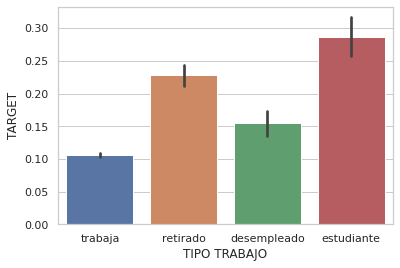

In [16]:
# target por tipo de trabajo
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="TIPO TRABAJO", y="TARGET", data=modelo)

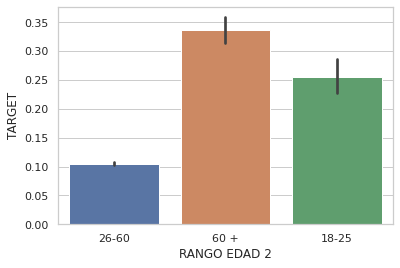

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="RANGO EDAD 2", y="TARGET", data=modelo)

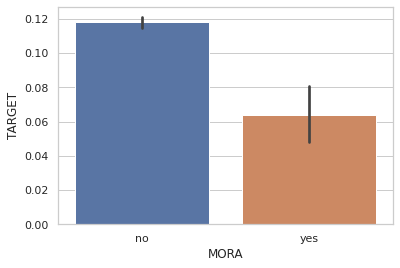

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="MORA", y="TARGET", data=modelo)

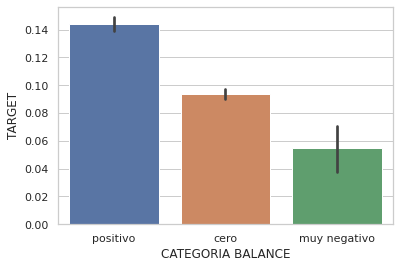

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="CATEGORIA BALANCE", y="TARGET", data=modelo)

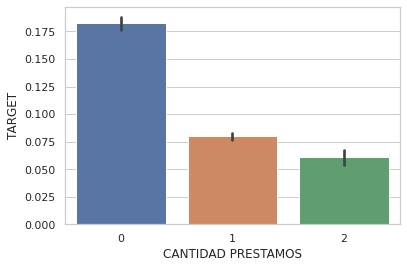

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="CANTIDAD PRESTAMOS", y="TARGET", data=modelo)

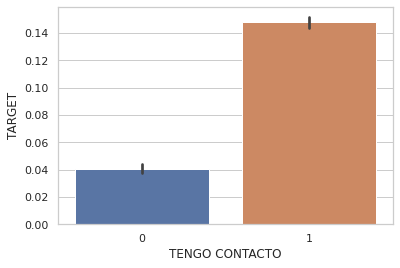

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="TENGO CONTACTO", y="TARGET", data=modelo)

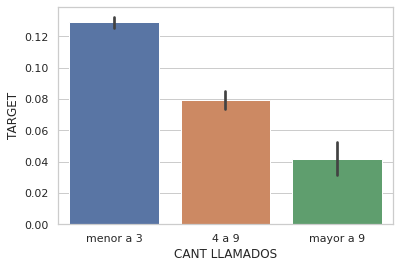

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="CANT LLAMADOS", y="TARGET", data=modelo)

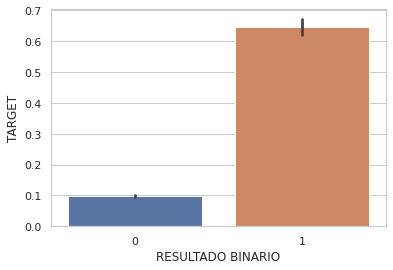

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="RESULTADO BINARIO", y="TARGET", data=modelo)

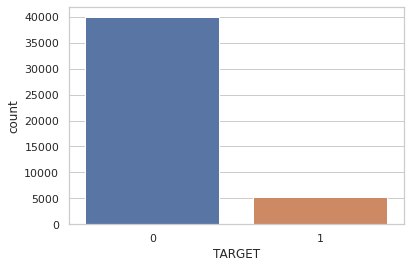

In [24]:
ax = sns.countplot(x= 'TARGET', data= modelo)

# seleccion de variables para modelo

In [25]:
modelo

,RANGO EDAD 2,TIPO TRABAJO,MORA,CATEGORIA BALANCE,CANTIDAD PRESTAMOS,TENGO CONTACTO,CANT LLAMADOS,RESULTADO BINARIO,TARGET
0,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
1,26-60,trabaja,no,cero,1,0,menor a 3,0,0
2,26-60,trabaja,no,cero,2,0,menor a 3,0,0
3,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
4,26-60,trabaja,no,cero,0,0,menor a 3,0,0
...,...,...,...,...,...,...,...,...,...
45206,26-60,trabaja,no,positivo,0,1,menor a 3,0,1
45207,60 +,retirado,no,positivo,0,1,menor a 3,0,1
45208,60 +,retirado,no,positivo,0,1,4 a 9,1,1
45209,26-60,trabaja,no,positivo,0,1,4 a 9,0,0


In [26]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RANGO EDAD 2        45211 non-null  object
 1   TIPO TRABAJO        45211 non-null  object
 2   MORA                45211 non-null  object
 3   CATEGORIA BALANCE   45211 non-null  object
 4   CANTIDAD PRESTAMOS  45211 non-null  int64 
 5   TENGO CONTACTO      45211 non-null  int64 
 6   CANT LLAMADOS       45211 non-null  object
 7   RESULTADO BINARIO   45211 non-null  int64 
 8   TARGET              45211 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.1+ MB


In [27]:
modelo.columns

Index(['RANGO EDAD 2', 'TIPO TRABAJO', 'MORA', 'CATEGORIA BALANCE',
       'CANTIDAD PRESTAMOS', 'TENGO CONTACTO', 'CANT LLAMADOS',
       'RESULTADO BINARIO', 'TARGET'],
      dtype='object')

#variables

In [28]:
regresion = modelo.select_dtypes(include='object')
regresion = pd.get_dummies(regresion)
regresion.columns
reg1 = regresion.drop(columns = ['RANGO EDAD 2_60 +', 'TIPO TRABAJO_retirado', 'MORA_no', 'CATEGORIA BALANCE_cero','CANT LLAMADOS_mayor a 9' ])
reg1

,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,TIPO TRABAJO_desempleado,TIPO TRABAJO_estudiante,TIPO TRABAJO_trabaja,MORA_yes,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo,CANT LLAMADOS_4 a 9,CANT LLAMADOS_menor a 3
0,0,1,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,1,0,0,1,0,1
45207,0,0,0,0,0,0,0,1,0,1
45208,0,0,0,0,0,0,0,1,1,0
45209,0,1,0,0,1,0,0,1,1,0


In [29]:
reg2 = reg1.merge(modelo, left_index=True, right_index=True)
reg2

,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,TIPO TRABAJO_desempleado,TIPO TRABAJO_estudiante,TIPO TRABAJO_trabaja,MORA_yes,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo,CANT LLAMADOS_4 a 9,CANT LLAMADOS_menor a 3,RANGO EDAD 2,TIPO TRABAJO,MORA,CATEGORIA BALANCE,CANTIDAD PRESTAMOS,TENGO CONTACTO,CANT LLAMADOS,RESULTADO BINARIO,TARGET
0,0,1,0,0,1,0,0,1,0,1,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
1,0,1,0,0,1,0,0,0,0,1,26-60,trabaja,no,cero,1,0,menor a 3,0,0
2,0,1,0,0,1,0,0,0,0,1,26-60,trabaja,no,cero,2,0,menor a 3,0,0
3,0,1,0,0,1,0,0,1,0,1,26-60,trabaja,no,positivo,1,0,menor a 3,0,0
4,0,1,0,0,1,0,0,0,0,1,26-60,trabaja,no,cero,0,0,menor a 3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,1,0,0,1,0,1,26-60,trabaja,no,positivo,0,1,menor a 3,0,1
45207,0,0,0,0,0,0,0,1,0,1,60 +,retirado,no,positivo,0,1,menor a 3,0,1
45208,0,0,0,0,0,0,0,1,1,0,60 +,retirado,no,positivo,0,1,4 a 9,1,1
45209,0,1,0,0,1,0,0,1,1,0,26-60,trabaja,no,positivo,0,1,4 a 9,0,0


In [30]:

reg3 = reg2.select_dtypes(exclude='object')
reg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   RANGO EDAD 2_18-25              45211 non-null  uint8
 1   RANGO EDAD 2_26-60              45211 non-null  uint8
 2   TIPO TRABAJO_desempleado        45211 non-null  uint8
 3   TIPO TRABAJO_estudiante         45211 non-null  uint8
 4   TIPO TRABAJO_trabaja            45211 non-null  uint8
 5   MORA_yes                        45211 non-null  uint8
 6   CATEGORIA BALANCE_muy negativo  45211 non-null  uint8
 7   CATEGORIA BALANCE_positivo      45211 non-null  uint8
 8   CANT LLAMADOS_4 a 9             45211 non-null  uint8
 9   CANT LLAMADOS_menor a 3         45211 non-null  uint8
 10  CANTIDAD PRESTAMOS              45211 non-null  int64
 11  TENGO CONTACTO                  45211 non-null  int64
 12  RESULTADO BINARIO               45211 non-null  int64
 13  T

In [31]:
df_corr = reg3.corr('pearson')
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,TIPO TRABAJO_desempleado,TIPO TRABAJO_estudiante,TIPO TRABAJO_trabaja,MORA_yes,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo,CANT LLAMADOS_4 a 9,CANT LLAMADOS_menor a 3,CANTIDAD PRESTAMOS,TENGO CONTACTO,RESULTADO BINARIO,TARGET
RANGO EDAD 2_18-25,1.000000,-0.547228,-0.008293,0.363129,-0.146163,-0.003240,-0.007334,-0.014044,-0.022692,0.025465,-0.023131,-0.006272,0.030599,0.058329
RANGO EDAD 2_26-60,-0.547228,1.000000,0.023728,-0.182331,0.378768,0.019121,0.023032,-0.052309,0.029430,-0.035288,0.150430,-0.064228,-0.107091,-0.149070
TIPO TRABAJO_desempleado,-0.008293,0.023728,1.000000,-0.025075,-0.517824,0.006470,-0.009656,0.012766,-0.016047,0.019643,-0.059005,0.018464,0.015044,0.020390
TIPO TRABAJO_estudiante,0.363129,-0.182331,-0.025075,1.000000,-0.437536,-0.016222,-0.016898,0.007270,-0.018419,0.023119,-0.101204,0.043908,0.048048,0.076897
TIPO TRABAJO_trabaja,-0.146163,0.378768,-0.517824,-0.437536,1.000000,0.012327,0.024075,-0.048239,0.027622,-0.037620,0.177421,-0.057789,-0.071670,-0.105686
MORA_yes,-0.003240,0.019121,0.006470,-0.016222,0.012327,1.000000,0.173895,-0.114797,0.011039,-0.015101,0.040238,-0.019933,-0.023344,-0.022419
CATEGORIA BALANCE_muy negativo,-0.007334,0.023032,-0.009656,-0.016898,0.024075,0.173895,1.000000,-0.119198,0.003569,-0.005372,0.099719,-0.034363,-0.023200,-0.024127
CATEGORIA BALANCE_positivo,-0.014044,-0.052309,0.012766,0.007270,-0.048239,-0.114797,-0.119198,1.000000,-0.019774,0.030654,-0.093068,0.040677,0.059125,0.080350
CANT LLAMADOS_4 a 9,-0.022692,0.029430,-0.016047,-0.018419,0.027622,0.011039,0.003569,-0.019774,1.000000,-0.902698,-0.026526,0.032664,-0.048386,-0.055210
CANT LLAMADOS_menor a 3,0.025465,-0.035288,0.019643,0.023119,-0.037620,-0.015101,-0.005372,0.030654,-0.902698,1.000000,0.027578,-0.022592,0.059853,0.070373


In [32]:
reg3.columns

Index(['RANGO EDAD 2_18-25', 'RANGO EDAD 2_26-60', 'TIPO TRABAJO_desempleado',
       'TIPO TRABAJO_estudiante', 'TIPO TRABAJO_trabaja', 'MORA_yes',
       'CATEGORIA BALANCE_muy negativo', 'CATEGORIA BALANCE_positivo',
       'CANT LLAMADOS_4 a 9', 'CANT LLAMADOS_menor a 3', 'CANTIDAD PRESTAMOS',
       'TENGO CONTACTO', 'RESULTADO BINARIO', 'TARGET'],
      dtype='object')

In [33]:
Y = reg3['TARGET']
X = reg3[['RANGO EDAD 2_18-25', 'RANGO EDAD 2_26-60', 'TIPO TRABAJO_desempleado',
       'TIPO TRABAJO_estudiante', 'TIPO TRABAJO_trabaja', 'MORA_yes',
       'CATEGORIA BALANCE_muy negativo', 'CATEGORIA BALANCE_positivo',
       'CANT LLAMADOS_4 a 9', 'CANT LLAMADOS_menor a 3', 'CANTIDAD PRESTAMOS',
       'TENGO CONTACTO', 'RESULTADO BINARIO']]

In [34]:
reg3.head(10)

,RANGO EDAD 2_18-25,RANGO EDAD 2_26-60,TIPO TRABAJO_desempleado,TIPO TRABAJO_estudiante,TIPO TRABAJO_trabaja,MORA_yes,CATEGORIA BALANCE_muy negativo,CATEGORIA BALANCE_positivo,CANT LLAMADOS_4 a 9,CANT LLAMADOS_menor a 3,CANTIDAD PRESTAMOS,TENGO CONTACTO,RESULTADO BINARIO,TARGET
0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,0,0,1,0,0,0,0,1,2,0,0,0
3,0,1,0,0,1,0,0,1,0,1,1,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,1,0,0,0,0,1,1,0,0,0
6,0,1,0,0,1,0,0,0,0,1,2,0,0,0
7,0,1,0,0,1,1,0,0,0,1,1,0,0,0
8,0,1,0,0,0,0,0,0,0,1,1,0,0,0
9,0,1,0,0,1,0,0,1,0,1,1,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [36]:
import collections

In [37]:
collections.Counter(Y_test)

Counter({0: 9978, 1: 1325})

#modelos

##regresion

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [41]:
Y_pred=logreg.predict(X_test)

In [42]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[9843,  135],
       [1088,  237]])

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

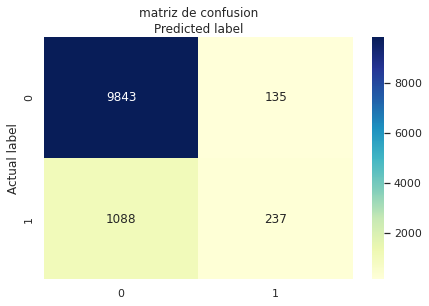

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8917986375298593
Precision: 0.6370967741935484
Recall: 0.17886792452830189


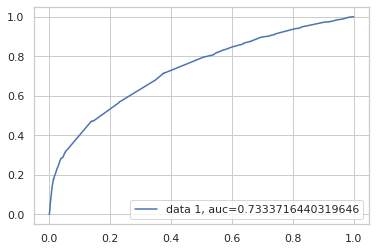

In [47]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## arboles


In [48]:
XArbol_train, XArbol_test, YArbol_train, YArbol_test = train_test_split(X,Y, train_size=0.75)

In [49]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [50]:
resultados=[]

In [51]:
for x in range(1,10,1):
 ETreg=ExtraTreesClassifier(n_estimators = x, max_depth=6)
 ETres=ETreg.fit(XArbol_train, YArbol_train)
 r2_1 = ETres.score(XArbol_train,YArbol_train)
 r2_2 = ETres.score(XArbol_test, YArbol_test)
 resultados.append([x,r2_1,r2_2])

In [52]:
resultados = pd.DataFrame(resultados, columns=["x","r2_1","r2_2"])
resultados

,x,r2_1,r2_2
0,1,0.887165,0.876228
1,2,0.893005,0.881359
2,3,0.891117,0.879413
3,4,0.889643,0.878970
4,5,0.890616,0.879501
5,6,0.896249,0.884632
6,7,0.896603,0.884809
7,8,0.891589,0.882509
8,9,0.896367,0.884986


In [53]:
depth = []

In [54]:
for x in range(4,15,1):
 ETreg=ExtraTreesClassifier(n_estimators = 5, max_depth=x, bootstrap = True)
 ETres=ETreg.fit(XArbol_train, YArbol_train)
 r2_1 = ETres.score(XArbol_train,YArbol_train)
 r2_2 = ETres.score(XArbol_test, YArbol_test)
 depth.append([x,r2_1,r2_2])

In [55]:
depth_ideal = pd.DataFrame(depth, columns=["x","r2_1","r2_2"])
depth_ideal

,x,r2_1,r2_2
0,4,0.887755,0.877201
1,5,0.894951,0.883748
2,6,0.895334,0.884190
3,7,0.896514,0.885075
4,8,0.896691,0.884632
5,9,0.896573,0.884013
6,10,0.896337,0.882774
7,11,0.896809,0.884367
8,12,0.896839,0.884367
9,13,0.896780,0.883836


In [56]:
# Extra trees Classifier

ETreg=ExtraTreesClassifier(n_estimators = 5, max_depth=8, bootstrap = True)

ETres=ETreg.fit(XArbol_train, YArbol_train)

In [57]:
ETres.score(X_train,Y_train)


0.8940368054736345

In [58]:
ETres.score(X_test, Y_test)

0.8910023887463505

In [59]:
YArbol_pred=ETres.predict(XArbol_test)

In [60]:
cnf_matrixArbol = metrics.confusion_matrix(YArbol_test, YArbol_pred)
cnf_matrixArbol

array([[9793,   93],
       [1216,  201]])

Text(0.5, 257.44, 'Predicted label')

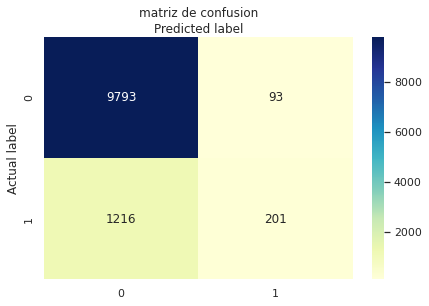

In [61]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixArbol), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
print("Accuracy:",metrics.accuracy_score(YArbol_test, YArbol_pred))
print("Precision:",metrics.precision_score(YArbol_test, YArbol_pred))
print("Recall:",metrics.recall_score(YArbol_test, YArbol_pred))

Accuracy: 0.8841900380429975
Precision: 0.6836734693877551
Recall: 0.14184897671136204


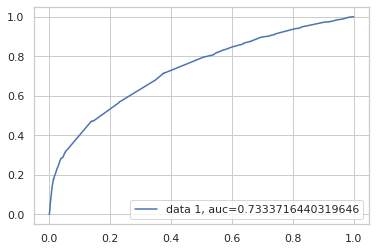

In [63]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
# random forest Classifier

RFreg=RandomForestClassifier(n_estimators = 5, max_depth=7, bootstrap = True)

RFres=RFreg.fit(XArbol_train, YArbol_train)

In [65]:
RFres.score(XArbol_train,YArbol_train)

0.8935059572962133

In [66]:
RFres.score(XArbol_test, YArbol_test)

0.8811819870830753

In [67]:
print("Accuracy:",metrics.accuracy_score(YArbol_test, YArbol_pred))
print("Precision:",metrics.precision_score(YArbol_test, YArbol_pred))
print("Recall:",metrics.recall_score(YArbol_test, YArbol_pred))

Accuracy: 0.8841900380429975
Precision: 0.6836734693877551
Recall: 0.14184897671136204


## SVM

In [68]:
YSvm = reg3['TARGET']
XSvm = reg3[['RANGO EDAD 2_18-25', 'RANGO EDAD 2_26-60', 'TIPO TRABAJO_desempleado',
       'TIPO TRABAJO_estudiante', 'TIPO TRABAJO_trabaja', 'MORA_yes',
       'CATEGORIA BALANCE_muy negativo', 'CATEGORIA BALANCE_positivo',
       'CANT LLAMADOS_4 a 9', 'CANT LLAMADOS_menor a 3', 'CANTIDAD PRESTAMOS',
       'TENGO CONTACTO', 'RESULTADO BINARIO']]

In [69]:
from sklearn.model_selection import train_test_split
XSvm_train,XSvm_test,YSvm_train,YSvm_test=train_test_split(XSvm,YSvm,test_size=0.25,random_state=0)

In [70]:
from sklearn import svm

In [71]:
clf = svm.SVC(kernel='linear')

In [72]:
#entrenamiento
clf.fit(XSvm_train, YSvm_train)

SVC(kernel='linear')

In [73]:
#predciccion de test
YSvm_pred = clf.predict(XSvm_test)

In [74]:
print("Accuracy:",metrics.accuracy_score(YSvm_test, YSvm_pred))
print("Precision:",metrics.precision_score(YSvm_test, YSvm_pred))
print("Recall:",metrics.recall_score(YSvm_test, YSvm_pred))

Accuracy: 0.8904715562240113
Precision: 0.6095717884130982
Recall: 0.18264150943396226


# nuevo tratamiento del dataset

## edad

In [75]:
df.head(20)


,EDAD,RANGO EDAD,RANGO EDAD 2,TRABAJO,ESTADO CIVIL,EDUCACION,MORA,BALANCE,balance outlier 5%,Balance outlier ICR,log balance,CATEGORIA BALANCE,PRESTAMO PARA CASA,PRESTAMO PERSONAL,CANTIDAD PRESTAMOS,TIPO CONTACTO,TENGO CONTACTO,ULTIMO DIA CONTACTO,ULTIMO MES CONTACTO,DURACION,DURACION MINUTOS,TIPO DURACION,CANTIDAD LLAMADOS,DIAS DESDE EL ULTIMO LLAMADO,CANT LLAMADOS CAMPAÑA ANTERIOR,RESULTADO LLAMADOS ANTERIORES,RESULTADO BINARIO,TIENE DEPOSITO A LARGO PLAZO,TARGET
0,58,51-60,26-60,management,married,tertiary,no,2143,0,0,3.331022,positivo,yes,no,1,unknown,0,5,may,261,4,4 a 8,1,-1,0,unknown,0,no,0
1,44,41-50,26-60,technician,single,secondary,no,29,0,0,1.462398,cero,yes,no,1,unknown,0,5,may,151,3,1 a 4,1,-1,0,unknown,0,no,0
2,33,31-40,26-60,entrepreneur,married,secondary,no,2,0,0,0.301030,cero,yes,yes,2,unknown,0,5,may,76,1,1 a 4,1,-1,0,unknown,0,no,0
3,47,41-50,26-60,blue-collar,married,unknown,no,1506,0,0,3.177825,positivo,yes,no,1,unknown,0,5,may,92,2,1 a 4,1,-1,0,unknown,0,no,0
4,33,31-40,26-60,unknown,single,unknown,no,1,0,0,0.000000,cero,no,no,0,unknown,0,5,may,198,3,1 a 4,1,-1,0,unknown,0,no,0
5,35,31-40,26-60,management,married,tertiary,no,231,0,0,2.363612,cero,yes,no,1,unknown,0,5,may,139,2,1 a 4,1,-1,0,unknown,0,no,0
6,28,21-30,26-60,management,single,tertiary,no,447,0,0,2.650308,cero,yes,yes,2,unknown,0,5,may,217,4,4 a 8,1,-1,0,unknown,0,no,0
7,42,41-50,26-60,entrepreneur,divorced,tertiary,yes,2,0,0,0.301030,cero,yes,no,1,unknown,0,5,may,380,6,4 a 8,1,-1,0,unknown,0,no,0
8,58,51-60,26-60,retired,married,primary,no,121,0,0,2.082785,cero,yes,no,1,unknown,0,5,may,50,1,1 a 4,1,-1,0,unknown,0,no,0
9,43,41-50,26-60,technician,single,secondary,no,593,0,0,2.773055,positivo,yes,no,1,unknown,0,5,may,55,1,1 a 4,1,-1,0,unknown,0,no,0


In [76]:
df.columns

Index(['EDAD', 'RANGO EDAD', 'RANGO EDAD 2', 'TRABAJO', 'ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET'],
      dtype='object')

In [77]:
data = df[['EDAD', 'RANGO EDAD', 'RANGO EDAD 2', 'TRABAJO', 'ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET']]


In [78]:
RangoEdad_mean = data.groupby([ "RANGO EDAD" ])[[ "TARGET" ]].mean()
RangoEdad_mean.sort_values(by=['TARGET'],ascending=False)



,TARGET
RANGO EDAD,
71-80,0.424528
80 +,0.423077
18-20,0.382979
61-70,0.296748
21-30,0.174129
31-40,0.105755
51-60,0.093341
41-50,0.091205


In [79]:
data = data.join(RangoEdad_mean, on = 'RANGO EDAD', how= 'left', rsuffix= '_RangoEdad')

In [80]:
data.head(10)

,EDAD,RANGO EDAD,RANGO EDAD 2,TRABAJO,ESTADO CIVIL,EDUCACION,MORA,BALANCE,balance outlier 5%,Balance outlier ICR,log balance,CATEGORIA BALANCE,PRESTAMO PARA CASA,PRESTAMO PERSONAL,CANTIDAD PRESTAMOS,TIPO CONTACTO,TENGO CONTACTO,ULTIMO DIA CONTACTO,ULTIMO MES CONTACTO,DURACION,DURACION MINUTOS,TIPO DURACION,CANTIDAD LLAMADOS,DIAS DESDE EL ULTIMO LLAMADO,CANT LLAMADOS CAMPAÑA ANTERIOR,RESULTADO LLAMADOS ANTERIORES,RESULTADO BINARIO,TIENE DEPOSITO A LARGO PLAZO,TARGET,TARGET_RangoEdad
0,58,51-60,26-60,management,married,tertiary,no,2143,0,0,3.331022,positivo,yes,no,1,unknown,0,5,may,261,4,4 a 8,1,-1,0,unknown,0,no,0,0.093341
1,44,41-50,26-60,technician,single,secondary,no,29,0,0,1.462398,cero,yes,no,1,unknown,0,5,may,151,3,1 a 4,1,-1,0,unknown,0,no,0,0.091205
2,33,31-40,26-60,entrepreneur,married,secondary,no,2,0,0,0.301030,cero,yes,yes,2,unknown,0,5,may,76,1,1 a 4,1,-1,0,unknown,0,no,0,0.105755
3,47,41-50,26-60,blue-collar,married,unknown,no,1506,0,0,3.177825,positivo,yes,no,1,unknown,0,5,may,92,2,1 a 4,1,-1,0,unknown,0,no,0,0.091205
4,33,31-40,26-60,unknown,single,unknown,no,1,0,0,0.000000,cero,no,no,0,unknown,0,5,may,198,3,1 a 4,1,-1,0,unknown,0,no,0,0.105755
5,35,31-40,26-60,management,married,tertiary,no,231,0,0,2.363612,cero,yes,no,1,unknown,0,5,may,139,2,1 a 4,1,-1,0,unknown,0,no,0,0.105755
6,28,21-30,26-60,management,single,tertiary,no,447,0,0,2.650308,cero,yes,yes,2,unknown,0,5,may,217,4,4 a 8,1,-1,0,unknown,0,no,0,0.174129
7,42,41-50,26-60,entrepreneur,divorced,tertiary,yes,2,0,0,0.301030,cero,yes,no,1,unknown,0,5,may,380,6,4 a 8,1,-1,0,unknown,0,no,0,0.091205
8,58,51-60,26-60,retired,married,primary,no,121,0,0,2.082785,cero,yes,no,1,unknown,0,5,may,50,1,1 a 4,1,-1,0,unknown,0,no,0,0.093341
9,43,41-50,26-60,technician,single,secondary,no,593,0,0,2.773055,positivo,yes,no,1,unknown,0,5,may,55,1,1 a 4,1,-1,0,unknown,0,no,0,0.091205


In [81]:
data['Edad_puntaje'] = [100 if (x> 0,4) else 70 if (x > 0,3) else 40 if (x> 0,11) else 0 for x in data['TARGET_RangoEdad']]

In [82]:
data = data[['EDAD', 'RANGO EDAD', 'RANGO EDAD 2','Edad_puntaje', 'TRABAJO', 'ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET']]

## Trabajo

In [83]:
Trabajo_mean = data.groupby([ "TRABAJO" ])[[ "TARGET" ]].mean()
Trabajo_mean.sort_values(by=['TARGET'],ascending=False)

,TARGET
TRABAJO,
student,0.286780
retired,0.227915
unemployed,0.155027
management,0.137556
admin.,0.122027
self-employed,0.118429
unknown,0.118056
technician,0.110570
services,0.088830


In [84]:
data = data.join(Trabajo_mean, on = 'RANGO EDAD', how= 'left', rsuffix= '_Trabajo')

In [85]:
data['Trabajo_puntaje'] = [100 if (x> 0,2) else 70 if (x > 0,1) else 40  for x in data['TARGET_Trabajo']]

In [86]:
data = data[['EDAD', 'RANGO EDAD', 'RANGO EDAD 2','Edad_puntaje', 'TRABAJO','Trabajo_puntaje','ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET']]

## cantidad llamados

In [87]:
data['categoria llamados']= ['menor a 3' if (x<=3) else '4 a 9' if (x<=9) else 'mayor a 9' for x in data['CANTIDAD LLAMADOS']]

In [88]:
llamados_mean = data.groupby([ "categoria llamados" ])[[ "TARGET" ]].mean()*100
llamados_mean.sort_values(by=['TARGET'],ascending=False)

,TARGET
categoria llamados,
menor a 3,12.876019
4 a 9,7.922729
mayor a 9,4.172367


In [89]:
data['llamados_puntaje'] = [0 if (x> 9) else 70 if (x > 3) else 100 for x in data['CANTIDAD LLAMADOS']]

In [90]:
data[['EDAD', 'RANGO EDAD', 'RANGO EDAD 2','Edad_puntaje', 'TRABAJO','Trabajo_puntaje','ESTADO CIVIL',
       'EDUCACION', 'MORA', 'BALANCE', 'balance outlier 5%',
       'Balance outlier ICR', 'log balance', 'CATEGORIA BALANCE',
       'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL', 'CANTIDAD PRESTAMOS',
       'TIPO CONTACTO', 'TENGO CONTACTO', 'ULTIMO DIA CONTACTO',
       'ULTIMO MES CONTACTO', 'DURACION', 'DURACION MINUTOS', 'TIPO DURACION',
       'CANTIDAD LLAMADOS','llamados_puntaje', 'DIAS DESDE EL ULTIMO LLAMADO',
       'CANT LLAMADOS CAMPAÑA ANTERIOR', 'RESULTADO LLAMADOS ANTERIORES',
       'RESULTADO BINARIO', 'TIENE DEPOSITO A LARGO PLAZO', 'TARGET']]

,EDAD,RANGO EDAD,RANGO EDAD 2,Edad_puntaje,TRABAJO,Trabajo_puntaje,ESTADO CIVIL,EDUCACION,MORA,BALANCE,balance outlier 5%,Balance outlier ICR,log balance,CATEGORIA BALANCE,PRESTAMO PARA CASA,PRESTAMO PERSONAL,CANTIDAD PRESTAMOS,TIPO CONTACTO,TENGO CONTACTO,ULTIMO DIA CONTACTO,ULTIMO MES CONTACTO,DURACION,DURACION MINUTOS,TIPO DURACION,CANTIDAD LLAMADOS,llamados_puntaje,DIAS DESDE EL ULTIMO LLAMADO,CANT LLAMADOS CAMPAÑA ANTERIOR,RESULTADO LLAMADOS ANTERIORES,RESULTADO BINARIO,TIENE DEPOSITO A LARGO PLAZO,TARGET
0,58,51-60,26-60,100,management,100,married,tertiary,no,2143,0,0,3.331022,positivo,yes,no,1,unknown,0,5,may,261,4,4 a 8,1,100,-1,0,unknown,0,no,0
1,44,41-50,26-60,100,technician,100,single,secondary,no,29,0,0,1.462398,cero,yes,no,1,unknown,0,5,may,151,3,1 a 4,1,100,-1,0,unknown,0,no,0
2,33,31-40,26-60,100,entrepreneur,100,married,secondary,no,2,0,0,0.301030,cero,yes,yes,2,unknown,0,5,may,76,1,1 a 4,1,100,-1,0,unknown,0,no,0
3,47,41-50,26-60,100,blue-collar,100,married,unknown,no,1506,0,0,3.177825,positivo,yes,no,1,unknown,0,5,may,92,2,1 a 4,1,100,-1,0,unknown,0,no,0
4,33,31-40,26-60,100,unknown,100,single,unknown,no,1,0,0,0.000000,cero,no,no,0,unknown,0,5,may,198,3,1 a 4,1,100,-1,0,unknown,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,51-60,26-60,100,technician,100,married,tertiary,no,825,0,0,2.916454,positivo,no,no,0,cellular,1,17,nov,977,16,mas de 15,3,100,-1,0,unknown,0,yes,1
45207,71,71-80,60 +,100,retired,100,divorced,primary,no,1729,0,0,3.237795,positivo,no,no,0,cellular,1,17,nov,456,8,8 a 12,2,100,-1,0,unknown,0,yes,1
45208,72,71-80,60 +,100,retired,100,married,secondary,no,5715,0,1,3.757016,positivo,no,no,0,cellular,1,17,nov,1127,19,mas de 15,5,70,184,3,success,1,yes,1
45209,57,51-60,26-60,100,blue-collar,100,married,secondary,no,668,0,0,2.824776,positivo,no,no,0,telephone,1,17,nov,508,8,8 a 12,4,70,-1,0,unknown,0,no,0


# seleccion de variables

In [91]:
data.columns

Index(['EDAD', 'RANGO EDAD', 'RANGO EDAD 2', 'Edad_puntaje', 'TRABAJO',
       'Trabajo_puntaje', 'ESTADO CIVIL', 'EDUCACION', 'MORA', 'BALANCE',
       'balance outlier 5%', 'Balance outlier ICR', 'log balance',
       'CATEGORIA BALANCE', 'PRESTAMO PARA CASA', 'PRESTAMO PERSONAL',
       'CANTIDAD PRESTAMOS', 'TIPO CONTACTO', 'TENGO CONTACTO',
       'ULTIMO DIA CONTACTO', 'ULTIMO MES CONTACTO', 'DURACION',
       'DURACION MINUTOS', 'TIPO DURACION', 'CANTIDAD LLAMADOS',
       'DIAS DESDE EL ULTIMO LLAMADO', 'CANT LLAMADOS CAMPAÑA ANTERIOR',
       'RESULTADO LLAMADOS ANTERIORES', 'RESULTADO BINARIO',
       'TIENE DEPOSITO A LARGO PLAZO', 'TARGET', 'categoria llamados',
       'llamados_puntaje'],
      dtype='object')

In [92]:
Numericas = data[[ 'Edad_puntaje','Trabajo_puntaje', 'log balance',
      'CANTIDAD PRESTAMOS', 'llamados_puntaje' , 'RESULTADO BINARIO','TENGO CONTACTO', 'TARGET']]

In [93]:
categoricas = data[['MORA','TIPO DURACION']]

In [94]:
categoricas = pd.get_dummies(categoricas)
categoricas

,MORA_no,MORA_yes,TIPO DURACION_1 a 4,TIPO DURACION_12 a 15,TIPO DURACION_4 a 8,TIPO DURACION_8 a 12,TIPO DURACION_mas de 15,TIPO DURACION_menos de 1
0,1,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
45206,1,0,0,0,0,0,1,0
45207,1,0,0,0,0,1,0,0
45208,1,0,0,0,0,0,1,0
45209,1,0,0,0,0,1,0,0


In [95]:
cat1 = categoricas.drop(columns = ['MORA_no', 'TIPO DURACION_mas de 15'])
cat1

,MORA_yes,TIPO DURACION_1 a 4,TIPO DURACION_12 a 15,TIPO DURACION_4 a 8,TIPO DURACION_8 a 12,TIPO DURACION_menos de 1
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
45206,0,0,0,0,0,0
45207,0,0,0,0,1,0
45208,0,0,0,0,0,0
45209,0,0,0,0,1,0


In [96]:
modelo2 = cat1.merge(Numericas, left_index=True, right_index=True)
modelo2

,MORA_yes,TIPO DURACION_1 a 4,TIPO DURACION_12 a 15,TIPO DURACION_4 a 8,TIPO DURACION_8 a 12,TIPO DURACION_menos de 1,Edad_puntaje,Trabajo_puntaje,log balance,CANTIDAD PRESTAMOS,llamados_puntaje,RESULTADO BINARIO,TENGO CONTACTO,TARGET
0,0,0,0,1,0,0,100,100,3.331022,1,100,0,0,0
1,0,1,0,0,0,0,100,100,1.462398,1,100,0,0,0
2,0,1,0,0,0,0,100,100,0.301030,2,100,0,0,0
3,0,1,0,0,0,0,100,100,3.177825,1,100,0,0,0
4,0,1,0,0,0,0,100,100,0.000000,0,100,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,100,100,2.916454,0,100,0,1,1
45207,0,0,0,0,1,0,100,100,3.237795,0,100,0,1,1
45208,0,0,0,0,0,0,100,100,3.757016,0,70,1,1,1
45209,0,0,0,0,1,0,100,100,2.824776,0,70,0,1,0


In [97]:
modelo2.columns

Index(['MORA_yes', 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 'Edad_puntaje', 'Trabajo_puntaje',
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO', 'TARGET'],
      dtype='object')

# modelos

## regresion logistica

In [98]:
X = modelo2[['MORA_yes', 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 'Edad_puntaje', 'Trabajo_puntaje',
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO']]
Y = modelo2['TARGET']

In [99]:
Xreg_train,Xreg_test,Yreg_train,Yreg_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [100]:
logreg = LogisticRegression()

In [101]:
logreg.fit(Xreg_train,Yreg_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [102]:
Yreg_pred=logreg.predict(Xreg_test)

In [103]:
matrizConfusion =  metrics.confusion_matrix(Yreg_test, Yreg_pred)
matrizConfusion

array([[9684,  294],
       [ 915,  410]])

Text(0.5, 257.44, 'Predicted label')

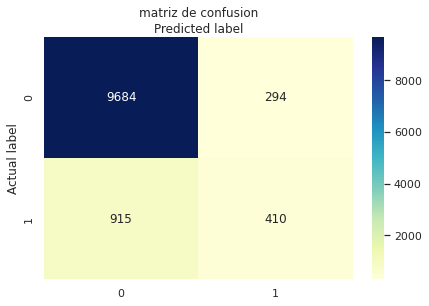

In [104]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrizConfusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
print("Accuracy:",metrics.accuracy_score(Yreg_test, Yreg_pred))
print("Precision:",metrics.precision_score(Yreg_test, Yreg_pred))
print("Recall:",metrics.recall_score(Yreg_test, Yreg_pred))

Accuracy: 0.8930372467486508
Precision: 0.5823863636363636
Recall: 0.30943396226415093


## arbol de decision

In [106]:
XArbol_train, XArbol_test, YArbol_train, YArbol_test = train_test_split(X,Y, train_size=0.75)

In [107]:
resultados = []

In [108]:
for x in range(1,10,1):
 ETreg=ExtraTreesClassifier(n_estimators = x, max_depth=10)
 ETres=ETreg.fit(XArbol_train, YArbol_train)
 r2_1 = ETres.score(XArbol_train,YArbol_train)
 r2_2 = ETres.score(XArbol_test, YArbol_test)
 resultados.append([x,r2_1,r2_2])

In [109]:
resultados = pd.DataFrame(resultados, columns=["x","r2_1","r2_2"])
resultados

,x,r2_1,r2_2
0,1,0.898018,0.888171
1,2,0.903179,0.890649
2,3,0.902884,0.892064
3,4,0.905185,0.895249
4,5,0.902501,0.893037
5,6,0.901911,0.892506
6,7,0.902589,0.893214
7,8,0.902884,0.892683
8,9,0.899965,0.888968


In [110]:
depth = []

In [111]:
for x in range(4,15,1):
 ETreg=ExtraTreesClassifier(n_estimators = 7, max_depth=x, bootstrap = True)
 ETres=ETreg.fit(XArbol_train, YArbol_train)
 r2_1 = ETres.score(XArbol_train,YArbol_train)
 r2_2 = ETres.score(XArbol_test, YArbol_test)
 depth.append([x,r2_1,r2_2])

In [112]:
depth_ideal = pd.DataFrame(depth, columns=["x","r2_1","r2_2"])
depth_ideal

,x,r2_1,r2_2
0,4,0.892238,0.889941
1,5,0.887962,0.885871
2,6,0.895688,0.891091
3,7,0.896278,0.890383
4,8,0.898667,0.892241
5,9,0.897664,0.889852
6,10,0.903769,0.894807
7,11,0.903297,0.892949
8,12,0.906364,0.893391
9,13,0.910700,0.893037


In [113]:
# Extra trees Classifier

ETreg=ExtraTreesClassifier(n_estimators = 5, max_depth=8, bootstrap = True)

ETres=ETreg.fit(XArbol_train, YArbol_train)

In [114]:
ETres.score(XArbol_train,YArbol_train)

0.8965435885336793

In [115]:
ETres.score(XArbol_test,YArbol_test)

0.8910023887463505

In [116]:
YArbol_pred=ETres.predict(XArbol_test)

In [117]:
matrizArbol = metrics.confusion_matrix(YArbol_test, YArbol_pred)
matrizArbol

array([[9891,   78],
       [1154,  180]])

Text(0.5, 257.44, 'Predicted label')

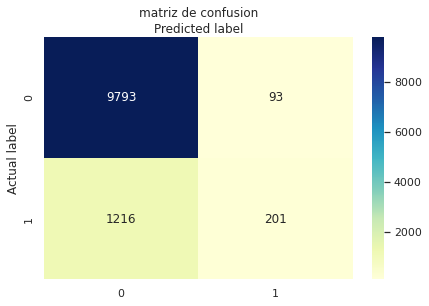

In [118]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixArbol), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## SVM

In [119]:
XSvm_train,XSvm_test,YSvm_train,YSvm_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [120]:
clf = svm.SVC(kernel='linear')

In [121]:
clf.fit(XSvm_train, YSvm_train)

SVC(kernel='linear')

In [122]:
YSvm_pred = clf.predict(XSvm_test)

In [123]:
print("Accuracy:",metrics.accuracy_score(YSvm_test, YSvm_pred))
print("Precision:",metrics.precision_score(YSvm_test, YSvm_pred))
print("Recall:",metrics.recall_score(YSvm_test, YSvm_pred))

Accuracy: 0.8958683535344599
Precision: 0.595360824742268
Recall: 0.34867924528301886


In [124]:
matrizConfusionSvm =  metrics.confusion_matrix(YSvm_test, YSvm_pred)
matrizConfusionSvm

array([[9664,  314],
       [ 863,  462]])

Text(0.5, 257.44, 'Predicted label')

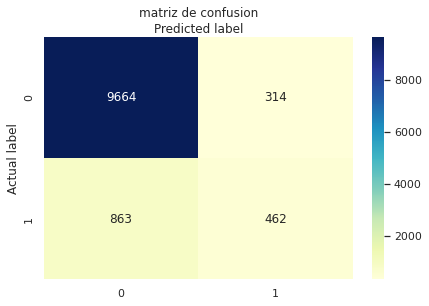

In [125]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrizConfusionSvm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Over sampling

In [126]:
modelo2.columns

Index(['MORA_yes', 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 'Edad_puntaje', 'Trabajo_puntaje',
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO', 'TARGET'],
      dtype='object')

In [127]:
x = modelo2[['MORA_yes', 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 'Edad_puntaje', 'Trabajo_puntaje',
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO']]

y = modelo2['TARGET']

In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
overSample = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columnas = X_train.columns

In [130]:
overSample_data_X,overSample_data_y = overSample.fit_resample(X_train, y_train)
overSample_data_X = pd.DataFrame(data=overSample_data_X,columns=columnas )
overSample_data_y= pd.DataFrame(data=overSample_data_y,columns=['TARGET'])

In [131]:
print("longitud del nuevo dataset",len(overSample_data_X))
print("Number of no subscription in oversampled data",len(overSample_data_y[overSample_data_y['TARGET']==0]))
print("Number of subscription",len(overSample_data_y[overSample_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(overSample_data_y[overSample_data_y['TARGET']==0])/len(overSample_data_X))
print("Proportion of subscription data in oversampled data is ",len(overSample_data_y[overSample_data_y['TARGET']==1])/len(overSample_data_X))

longitud del nuevo dataset 55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [132]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


In [133]:
logreg = LogisticRegression()

In [134]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.248319
         Iterations 13
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.312     
Dependent Variable:       TARGET                AIC:                   22477.5434
Date:                     2021-12-13 20:53      BIC:                   22582.1726
No. Observations:         45211                 Log-Likelihood:        -11227.   
Df Model:                 11                    LL-Null:               -16315.   
Df Residuals:             45199                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           13.0000                                                
---------------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|     [0.025     0.975]  
-----------------------------

In [135]:
X.columns

Index(['MORA_yes', 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 'Edad_puntaje', 'Trabajo_puntaje',
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO'],
      dtype='object')

In [136]:
columnas = [ 'TIPO DURACION_1 a 4', 'TIPO DURACION_12 a 15',
       'TIPO DURACION_4 a 8', 'TIPO DURACION_8 a 12',
       'TIPO DURACION_menos de 1', 
       'log balance', 'CANTIDAD PRESTAMOS', 'llamados_puntaje',
       'RESULTADO BINARIO', 'TENGO CONTACTO']

In [137]:
 X=overSample_data_X[columnas]
y=overSample_data_y['TARGET']

In [138]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.423665
         Iterations 10
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.389     
Dependent Variable:     TARGET             AIC:                47390.8462
Date:                   2021-12-13 20:53   BIC:                47480.1605
No. Observations:       55906              Log-Likelihood:     -23685.   
Df Model:               9                  LL-Null:            -38751.   
Df Residuals:           55896              LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         10.0000                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
TIPO DURACION_1 a 4      -4.7798   0.05

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [140]:
y_pred = logreg.predict(X_test)

In [141]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8038397328881469
Precision: 0.824410048211114
Recall: 0.7732032365540219


In [142]:
matrizConfusion =  metrics.confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[6984 1384]
 [1906 6498]]


Text(0.5, 257.44, 'Predicted label')

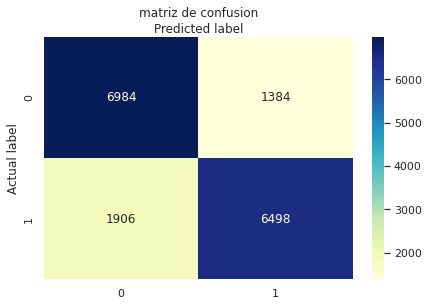

In [143]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrizConfusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('matriz de confusion', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      8368
           1       0.82      0.77      0.80      8404

    accuracy                           0.80     16772
   macro avg       0.81      0.80      0.80     16772
weighted avg       0.81      0.80      0.80     16772

